In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline


#### Libraries import

In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display

from sklearn import metrics
import matplotlib.pyplot as plt

__Read the csv file__

In [3]:
raw_data = pd.read_csv('kc_house_data.csv')
raw_data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


__Check for any null values in the columns__

In [4]:
print('Number of null values in each column')
raw_data.isnull().sum()

Number of null values in each column


id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

__Check for datatypes in the columns__

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

### Pre-processing
* In the dataset the date is in string type with format at YYYYMMDD, which will be seperated to seperate columns in year, month and date

In [18]:
year = []
month = []
day = []
for i in range(len(raw_data)):
    year.append(int(raw_data.date[i][:4]))
    month.append(int(raw_data.date[i][4:6]))
    day.append(int(raw_data.date[i][6:8]))
raw_data['year'] = year
raw_data['month'] = month
raw_data['day'] = day
raw_data.drop(labels = 'date',
              axis = 1,
              inplace = True)
raw_data

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,1955,0,98178,47.5112,-122.257,1340,5650,2014,10,13
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12,9
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,...,1933,0,98028,47.7379,-122.233,2720,8062,2015,2,25
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,1965,0,98136,47.5208,-122.393,1360,5000,2014,12,9
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,1987,0,98074,47.6168,-122.045,1800,7503,2015,2,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,...,2009,0,98103,47.6993,-122.346,1530,1509,2014,5,21
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,...,2014,0,98146,47.5107,-122.362,1830,7200,2015,2,23
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,...,2009,0,98144,47.5944,-122.299,1020,2007,2014,6,23
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,...,2004,0,98027,47.5345,-122.069,1410,1287,2015,1,16


### Split the data to validation and training set

In [19]:
def split_for_validation(a,n):
    '''
    a = dataframe,
    n = percentage of split
    '''
    return a[: len(a) - (int(len(a) * n))].copy(), a[len(a) - (int(len(a) * n)):].copy()  

In [45]:
feature_columns = raw_data.iloc[:,2:].values
dependent_column = raw_data.iloc[:,1].values
X_train, X_valid = split_for_validation(a = feature_columns,
                                        n = 0.1)
y_train, y_valid = split_for_validation(a = dependent_column,
                                        n = 0.1)
print('Training data: ', X_train.shape, y_train.shape)
print('Validation data: ', X_valid.shape, y_valid.shape)

Training data:  (19452, 21) (19452,)
Validation data:  (2161, 21) (2161,)


### Fit the random forest regressor model

In [46]:
m = RandomForestRegressor(n_jobs=-1)
m.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1)

__Accuracy of training data and validation data__

In [47]:
predTree = m.predict(X_valid)
print('Training accuracy: ', round((m.score(X_train, y_train))*100,2),'%')
print()
print('Validation accuracy: ', round((m.score(X_valid, y_valid))*100,2),'%')

Training accuracy:  98.19 %

Validation accuracy:  87.03 %


### Scatter plot to compare results of actual and predicted value for validation dataset

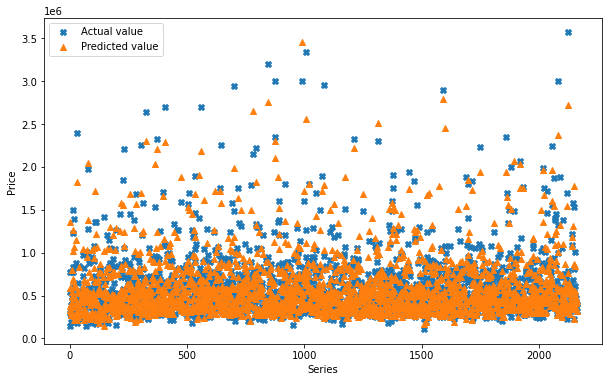

In [48]:
plt.figure(figsize=(10,6))
plt.scatter(x = list(range(len(y_valid))), y = y_valid, marker = 'X')
plt.scatter(x = list(range(len(predTree))), y = predTree, marker = '^')
plt.xlabel('Series')
plt.ylabel('Price')
plt.legend(['Actual value', 'Predicted value'])
plt.show()

### Plot absolute difference of actual and predicted value for validation dataset

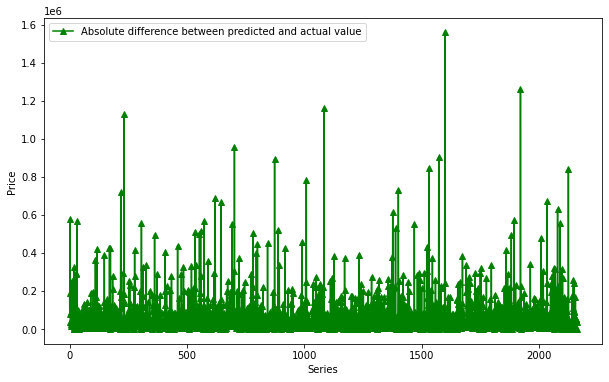

In [49]:
plt.figure(figsize=(10,6))
plt.plot(abs(predTree - y_valid), marker = '^', c = 'g')
plt.xlabel('Series')
plt.ylabel('Price')
plt.legend(['Absolute difference between predicted and actual value'])
plt.show()

### Frequency of difference in values

(array([1.92e+03, 1.70e+02, 3.70e+01, 1.80e+01, 6.00e+00, 5.00e+00,
        1.00e+00, 2.00e+00, 1.00e+00, 1.00e+00]),
 array([9.9000000e+01, 1.5591490e+05, 3.1173080e+05, 4.6754670e+05,
        6.2336260e+05, 7.7917850e+05, 9.3499440e+05, 1.0908103e+06,
        1.2466262e+06, 1.4024421e+06, 1.5582580e+06]),
 <a list of 10 Patch objects>)

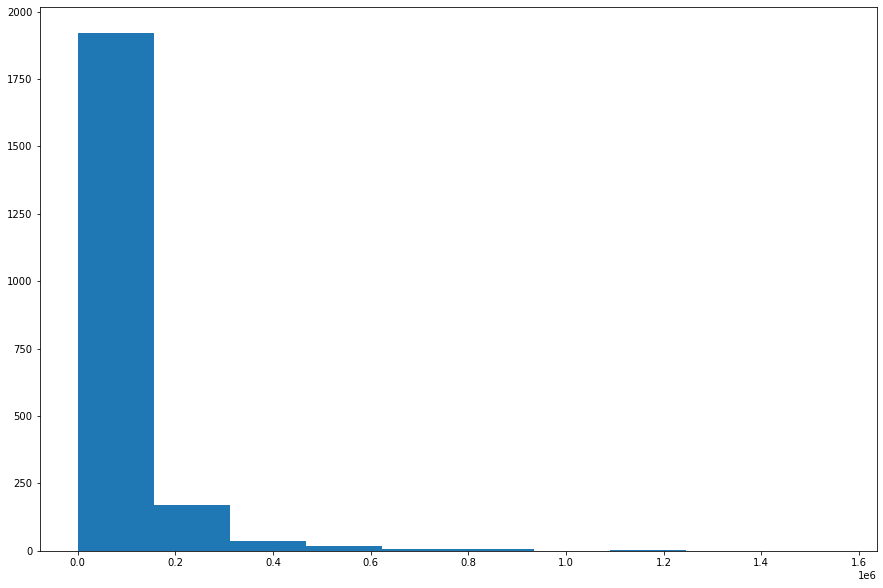

In [50]:
a = (abs(predTree - y_valid))
a = np.array(a, dtype='int')
# np.unique(a, return_counts=True)
plt.figure(figsize=(15,10))
# plt.hist(a, bins = len((np.unique(a, return_counts=True))[0]))
plt.hist(a, bins = 10)